<a href="https://colab.research.google.com/github/minaduranovic/vis-23/blob/main/vis_23_z1_tim4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Učitavanje dataset-a

In [ ]:
#@title
!git clone https://github.com/Senka2112/VIS2023-datasets

Cloning into 'VIS2023-datasets'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), 154.97 KiB | 1.11 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import cov
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [ ]:
df = pd.read_csv('VIS2023-datasets/MainDatasetInstagram.csv')
print(df.head(10))

     Users Number of Posts Number of Followers Number of Followings  \
0   User-1             486                 279                   19   
1   User-2             401               5,509                  342   
2   User-3             463                 453                  293   
3   User-4             154               1,231                1,477   
4   User-5             786               9,620                  421   
5   User-6             490               7,702                  379   
6   User-7             405               1,282                  370   
7   User-8             638               2,312                  365   
8   User-9              73               1,819                  852   
9  User-10             600               2,056                  606   

   Number of Likes for the Tenth Previous Post  \
0                                           15   
1                                          360   
2                                           65   
3                 

# Osnovni podaci o dataset-u i priprema istog za anlizu

In [ ]:
#provjera izgleda seta podataka
df.head()

,Users,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
0,User-1,486,279,19,15,10,17,0,m
1,User-2,401,"5,509",342,360,440,428,0,f
2,User-3,463,453,293,65,68,149,4,f
3,User-4,154,"1,231","1,477",53,22,35,3,m
4,User-5,786,"9,620",421,623,1299,544,0,m


In [ ]:
# koje varijable postoje u setu podataka i koji su njihovi tipovi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Users                                                     1000 non-null   object
 1   Number of Posts                                           1000 non-null   object
 2   Number of Followers                                       1000 non-null   object
 3   Number of Followings                                      1000 non-null   object
 4   Number of Likes for the Tenth Previous Post               1000 non-null   int64 
 5   Number of Likes for the Eleventh Previous Post            1000 non-null   int64 
 6   Number of Likes for the Twelfth Previous Post             1000 non-null   int64 
 7   Number of Self-Presenting Posts from Nine Previous Posts  1000 non-null   int64 
 8    Gender                       

In [ ]:
# deskriptivna statistika za sve varijable u setu podataka
df.describe(include="all")

,Users,Number of Posts,Number of Followers,Number of Followings,Number of Likes for the Tenth Previous Post,Number of Likes for the Eleventh Previous Post,Number of Likes for the Twelfth Previous Post,Number of Self-Presenting Posts from Nine Previous Posts,Gender
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,527,823,844,NaN,NaN,NaN,NaN,2
top,User-1,67,221,"7,500",NaN,NaN,NaN,NaN,m
freq,1,12,4,5,NaN,NaN,NaN,NaN,500
mean,NaN,NaN,NaN,NaN,114.621000,112.477000,114.923000,4.014000,NaN
std,NaN,NaN,NaN,NaN,197.677054,192.674074,202.001628,3.180239,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.000000,19.000000,19.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,47.500000,51.000000,51.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,119.500000,116.000000,119.500000,7.000000,NaN


In [ ]:
df["Number of Followers"] = df["Number of Followers"].str.replace(',', '')
df["Number of Followers"]=pd.to_numeric(df["Number of Followers"])

In [ ]:
df["Number of Posts"] = df["Number of Posts"].str.replace(',', '')
df["Number of Posts"]=pd.to_numeric(df["Number of Posts"])

In [ ]:
df["Number of Followings"] = df["Number of Followings"].str.replace(',', '')
df["Number of Followings"]=pd.to_numeric(df["Number of Followings"])

In [ ]:
df_filtered = df[(df["Number of Followers"] < df["Number of Followers"].quantile(0.99))]

In [ ]:
df_filtered = df_filtered[(df_filtered["Number of Posts"] < df_filtered["Number of Posts"].quantile(0.99))]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Users                                                     1000 non-null   object
 1   Number of Posts                                           1000 non-null   int64 
 2   Number of Followers                                       1000 non-null   int64 
 3   Number of Followings                                      1000 non-null   int64 
 4   Number of Likes for the Tenth Previous Post               1000 non-null   int64 
 5   Number of Likes for the Eleventh Previous Post            1000 non-null   int64 
 6   Number of Likes for the Twelfth Previous Post             1000 non-null   int64 
 7   Number of Self-Presenting Posts from Nine Previous Posts  1000 non-null   int64 
 8    Gender                       

# Pitanje 1: Postoji li razlika u broju follower-a u odnosu na spol?

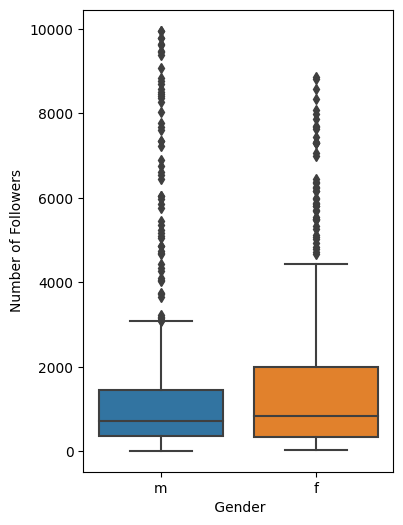

In [ ]:

fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=df, x=' Gender', y='Number of Followers')
plt.show()

In [ ]:
from IPython.display import Image


Da bismo odgovorili na ovo pitanje podatke o broju followers-a vizualiziramo box-plotom. Možemo primijetiti da ženski spol ima više followers-a, s tim da i pojedinci muškog spola koji spadaju u outlier-e imaju veći broj pratilaca.

# Pitanje 2: Postoji li razlika u broju postova u odnosu na spol?

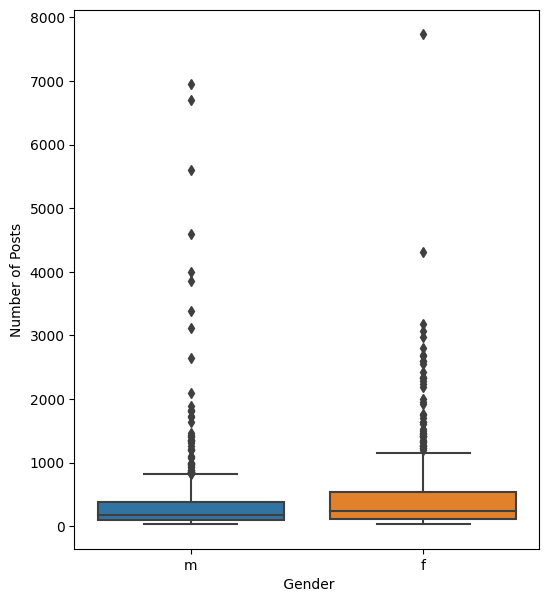

In [ ]:
fig, ax = plt.subplots(figsize=(6, 7))
sns.boxplot(data=df, x=' Gender', y='Number of Posts')
plt.show()

Podatke opet vizualiziramo box-plotom. Zaključujemo da ženski spol ima tendenciju da ima više objava u odnosu na pripadnike muškog spola. Da bismo bolje pogledali grafik, nacrtat ćemo još jedan s fokusom na podatke bez outlier-a sa ekstremnim vrijednostima.

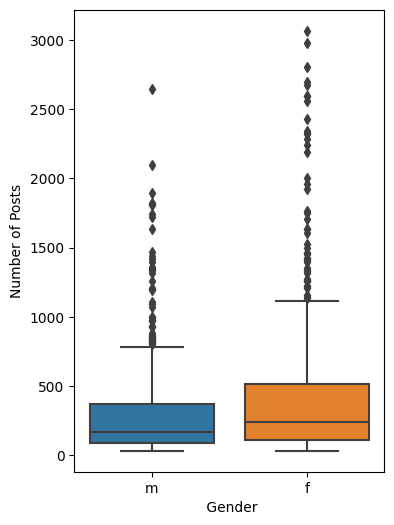

In [ ]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=df_filtered, x=' Gender', y='Number of Posts')
plt.show()

# Pretpostavka 1: Što osoba ima više post-ova, imat će i više follower-a

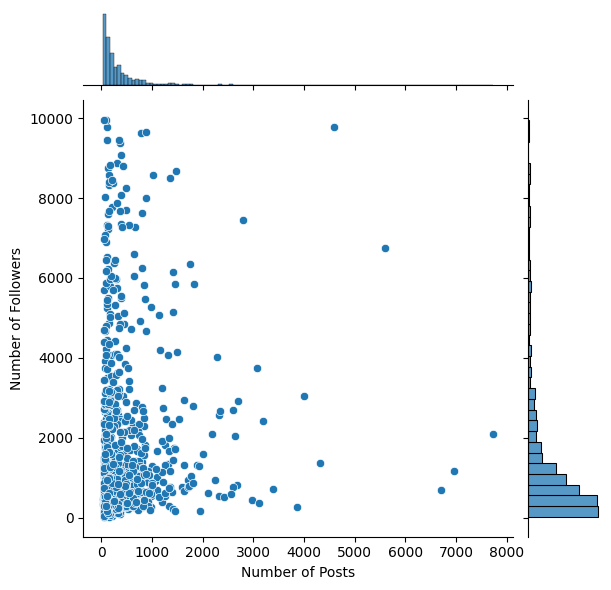

In [ ]:
sns.jointplot(x="Number of Posts", y="Number of Followers", data=df)

Ispitajmo i kovarijansu i korelaciju

In [ ]:
objave = df.loc[df[' Gender'] !='a','Number of Posts']
pratioci = df.loc[df[' Gender'] !='a',"Number of Followers"]

covariance = cov(pratioci, objave)
print(covariance)

[[3915246.68596497  171052.1228008 ]
 [ 171052.1228008   451028.93813413]]


Konkretno, vrijednost kovarijanse između broja pratilaca i broja objava iznosi 171052.12, što ukazuje na neki pozitivan odnos između te dvije varijable. Međutim, vrijednost je relativno mala u usporedbi s vrijednosti varijanse broja pratilaca (3915246.69), što ukazuje da broj pratilaca ima daleko veću varijabilnost nego broj objava.

Analiza kovarijanse ukazuje na neki pozitivan odnos između broja pratilaca i broja objava, ali taj odnos nije jako izražen.

In [ ]:
corr = np.corrcoef(pratioci, objave)
print(corr)

[[1.        0.1287202]
 [0.1287202 1.       ]]


Analiza korelacije ukazuje na neki pozitivan odnos između broja pratilaca i broja objava za osobe u skupu podataka, ali taj odnos nije jako izražen.

Kako je broj pratilaca u slaboj vezi sa brojem objava, zaključujemo da pretpostavka nije tačna.

# Pitanje 3: Kolika je vjerovatnoća da će osoba sa manje od 100 post-ova imati više od 5000 followers-a?

In [ ]:
brojnik = df[(df['Number of Followers']>5000) & (df['Number of Posts']<100)].shape[0]
nazivnik = df[df['Number of Posts']<100].shape[0]
vjerovatnoca = brojnik / nazivnik
print(vjerovatnoca)

0.032388663967611336


Vjerovatnoća za taj događaj je 3.2%

# Pretpostavka 2: Broj lajkova na postovima je veći što osoba ima veći broj pratitelja

Prvo ćemo razmotriti 3D prikaz zavisnosti broja lajkova i broja pratilaca korsnika:

In [ ]:
df = df.rename(columns={'Number of Self-Presenting Posts from Nine Previous Posts': 'Self-Presenting Posts','Number of Likes for the Tenth Previous Post': 'Tenth Post', 'Number of Likes for the Eleventh Previous Post': 'Eleventh Post', 'Number of Likes for the Twelfth Previous Post': 'Twelfth Post'})

In [ ]:
df_sorted = df.sort_values(by="Number of Followers", ascending=False)

In [ ]:
filtered_df = df[['Tenth Post', 'Eleventh Post', 'Twelfth Post', 'Number of Followers']]

fig = px.scatter_3d(filtered_df, x='Tenth Post', y='Eleventh Post', z='Twelfth Post', color='Number of Followers', color_discrete_sequence=['blue', 'pink'])


fig.show()


Kao što možemo primjetiti ne postoji jasna veza između broja lajkova na postovima i broja pratitelja korisnika. Da bi potvrdili zaključak o nedostatku jasne zavisnosti između dvije varijable, ispitat ćemo 2D prikaz tri odvojena slučaja. Prvi graph predstavlja zavinost broja lajkova na desetom postu i broja pratitelja:

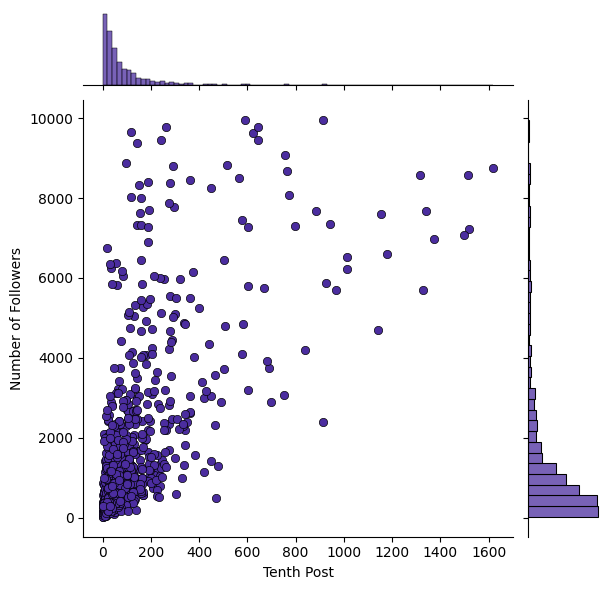

In [ ]:
sns.jointplot(x='Tenth Post', y='Number of Followers', data=df  , color='#4b2d9f', joint_kws={'edgecolor': 'black'})

Naredni graph je zavisnost broja pratitelja i lajkova na jedanaestom postu:

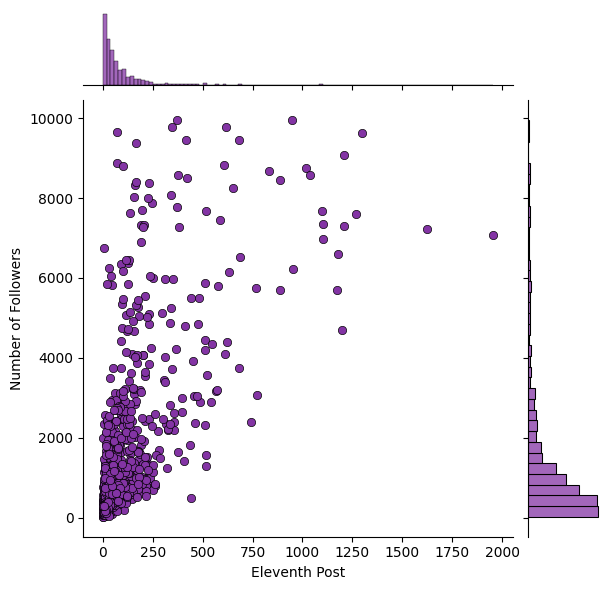

In [ ]:
sns.jointplot(x='Eleventh Post', y='Number of Followers', data=df , color='#8334a4', joint_kws={'edgecolor': 'black'})

i posljednji graph predstavlja zavisnost broja pratitelja i lajkova na dvanaestom postu:

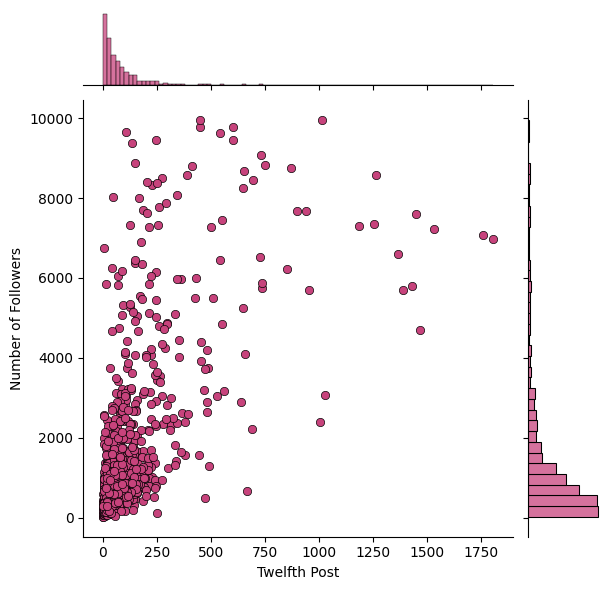

In [ ]:
sns.jointplot(x='Twelfth Post', y='Number of Followers', data=df, color='#c7437c', joint_kws={'edgecolor': 'black'})

Na osnovu priloženog, ne uočavamo jasnu povezanost između broja lajkova i broja pratitelja, što ukazuje na nepostojanje veze između ova dva parametra. Uzimajući u obzir da ista situacija vrijedi u sva tri slučaja, možemo zaključiti da naša pretpostavka nije ispravna.

#Pitanje 4: Da li postoji razlika u broju Self-Presenting Post-ova u zavisnosti od spola osobe?

Prvo ćemo pokušati vizualizirati zavisnost između dvije varijable koristeći box-plot.

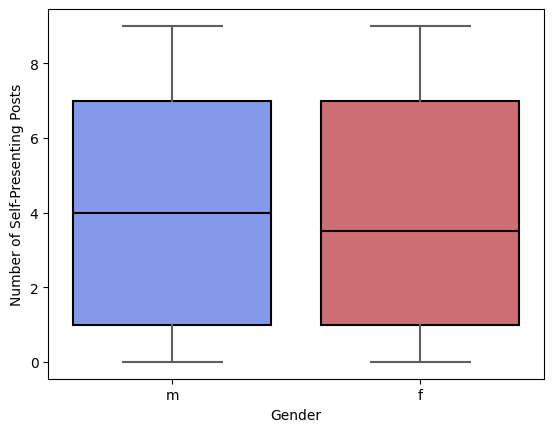

In [ ]:
sns.boxplot(data=df, x=' Gender', y='Self-Presenting Posts', palette={'m': '#738FFA', 'f': '#dd5f65'}, boxprops = dict(edgecolor='black'),  medianprops=dict(color='black'))
plt.xlabel('Gender')
plt.ylabel('Number of Self-Presenting Posts')

plt.show()

Pošto se iz box plota ne može sa sigurnošću zaključiti da postoji razlika, radi donošenja sigurnijeg zaključka izračunat ćemo zasebno vrijednost medijana:

In [ ]:
mediani = df.groupby(' Gender')['Self-Presenting Posts'].median()

print(mediani)

 Gender
f    3.5
m    4.0
Name: Self-Presenting Posts, dtype: float64


Zakljucak: Na osnovu prikazanih podataka, primjećujemo da muškarci imaju više Self-Presenting objava u odnosu na žene. Međutim, razlika u mediani broja takvih objava između muškaraca i žena je vrlo mala.

# Pretpostavka 3: Broj ljudi koje korisnik prati je približan broju pratitelja korisnika.


Da bi potvrdili ili negirali našu pretpostavku uradit ćemo scatter-plot na kojem ćemo prikazati zavisnost između dvije varijable (Number of Followers i Number of Followings):

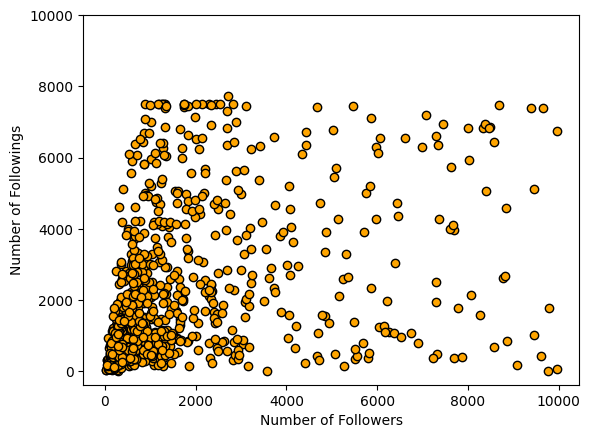

In [ ]:
v1 = df['Number of Followers']
v2 = df['Number of Followings']

plt.scatter(v1, v2, color='orange', edgecolors='black')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Followings')
x_ticks=[0, 2000, 4000, 6000, 8000, 10000]
x_ticks_labels=['0' ,'2000', '4000','6000', '8000', '10000']
y_ticks=[0, 2000, 4000, 6000, 8000, 10000]
y_ticks_labels=['0' ,'2000', '4000','6000', '8000', '10000']

plt.xticks(x_ticks, x_ticks_labels)
plt.yticks(y_ticks, y_ticks_labels)
plt.show()

Obzirom da ne možemo donijeti poseban zaključak ispitati ćemo jačinu veze računajući kovarijansu i korelaciju:

In [ ]:
#računanje kovarijanse
zFollowers = df.loc[df[' Gender'] =='f', 'Number of Followers']
zFollowings = df.loc[df[' Gender'] =='f', 'Number of Followings']
covariance = cov(zFollowers, zFollowings)
print(covariance)

[[3406089.4740521  1367615.82334269]
 [1367615.82334269 3638716.68687776]]


In [ ]:
#računanje korelacije
corr = np.corrcoef(zFollowers, zFollowings)
print(corr)

[[1.         0.38847401]
 [0.38847401 1.        ]]


Iz priloženog vidimo da kod žena postoji “umjerena“ veza između dvije varijable jer vrijednost kovarijanse za broj pratitelja i broj profila koje korisnik prati iznosi 0.38847401. Da bi mogli potvrditi našu pretpostavku moramo ispitati i vezu kod drugog spola:

In [ ]:
mFollowers = df.loc[df[' Gender'] =='m', 'Number of Followers']
mFollowings = df.loc[df[' Gender'] =='m', 'Number of Followings']
covariance = cov(mFollowers, mFollowings)
print(covariance)


[[4431505.54329058 1768689.06328657]
 [1768689.06328657 4395360.84609219]]


In [ ]:
#korelacija
corr = np.corrcoef(mFollowers, mFollowings)
print(corr)

[[1.         0.40075465]
 [0.40075465 1.        ]]


Na osnovu navedenih vrijednosti, zaključujemo da postoji veza između 'Number of Followers' i 'Number of Followings', ali ta veza nije jaka, već umjerena. Ovim smo potvrdili ispravnost naše prvobitne pretpostavke.

# Pitanje 5: Kolika je vjerovatnoća da osoba koja ima više od 5000 followers-a prati više od 2000 profila?

In [ ]:
brojnik = df[(df['Number of Followers']>5000) & (df['Number of Followings']>2000)].shape[0]
nazivnik = df[df['Number of Followers']>5000].shape[0]
vjerovatnoca = brojnik / nazivnik
print(vjerovatnoca)

0.6024096385542169


Vjerovatnoća da osoba koja ima više od 5000 followers-a prati više od 2000 profila je 60%.

# Pitanje 6: Da li broj lajkova na postovima korisnika zavisi od broja lajkova na drugim postovima istog korisnika?

Da bi došli do traženog odgovora ispitat ćemo sljedeći joint-plot:

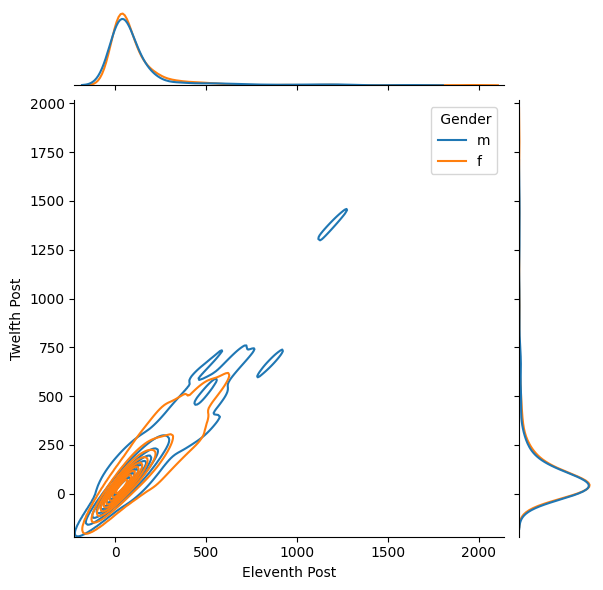

In [ ]:
sns.jointplot(data=df, x="Eleventh Post", y="Twelfth Post", kind="kde", hue=" Gender")

Analizom datog grapha dolazimo do zaključka da postoji jasna veza između broja lajkova na dva posta. Obzirom da se ne razlikuje po spolu osobe možemo zaključiti da je odgovor univerzalan.

# Pretpostavka 4: Što korisnik ima manji broj pratilaca imat će veći broj Self-presenting postova

Ispitat ćemo sljedeći joint-plot u cilju ispitivanja istinitosti pretpostavke:

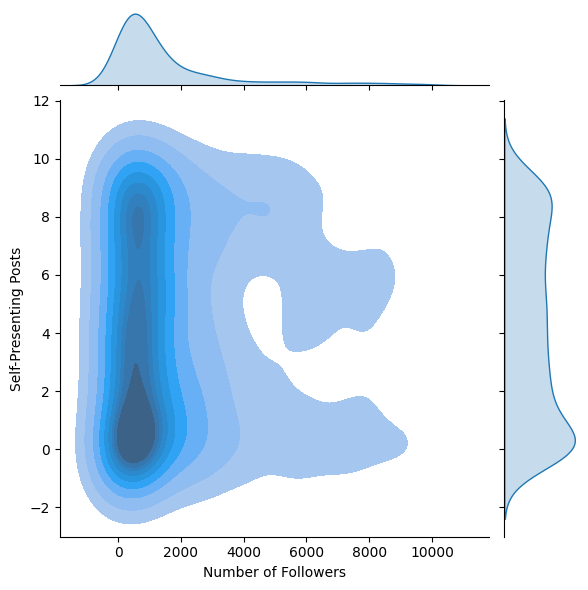

In [ ]:

sns.jointplot(data=df, x="Number of Followers", y="Self-Presenting Posts", kind="kde", fill=True)


Zaključak: Iz analize joint-plota vidimo da ne postoji zavisnost izmedju broja pratitelja i Self-presenting postova što znači da nam pretpostavka nije tačna.

# Pitanje 7: Kolika je vjerovatnoća da nasumično izabran korisnik ima više od 1000 pratioca?

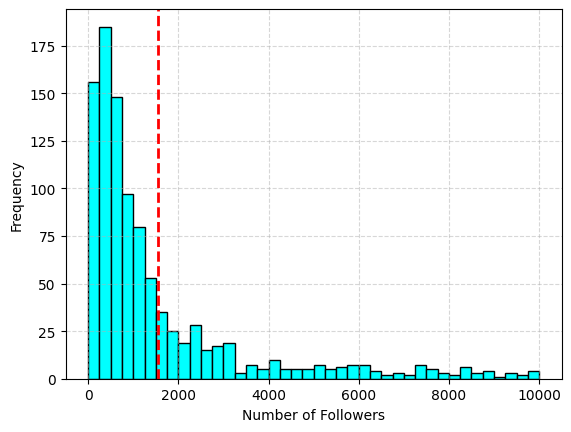

In [ ]:
plt.hist(df['Number of Followers'], range(0, 10001, 250), edgecolor='black',color='cyan', alpha=1.0)
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
mean = df['Number of Followers'].mean()
std = df['Number of Followers'].std()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
mean = df['Number of Followers'].mean()
std = df['Number of Followers'].std()
random= np.random.choice(df['Number of Followers'], size=1)
vrv = stats.norm.cdf(1000, mean, std)
print(vrv)

0.3920621795808013


Vjerovatnoća da će nasumično izabrani korisnik imati 1000 ili više pratioca je 0.3920621795808013

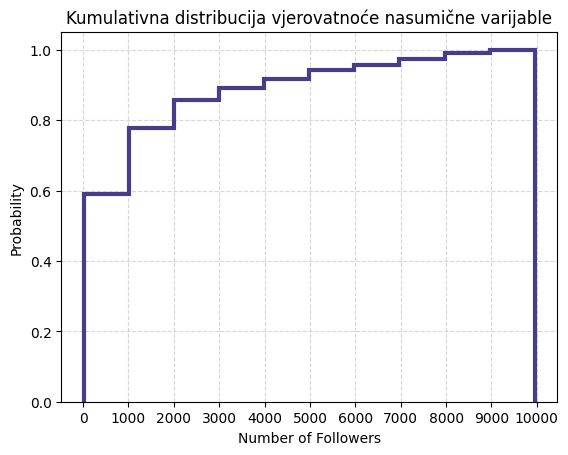

In [ ]:
plt.hist(df['Number of Followers'], cumulative=True, density=True, bins=10, histtype='step', color='darkslateblue',linewidth=3)
plt.xlabel('Number of Followers')
plt.ylabel('Probability')
plt.title('Kumulativna distribucija vjerovatnoće nasumične varijable')
plt.xticks(range(0, 10001, 1000))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Pretpostavka 5: Srednja vrijednost broja lajkova svih korisnika će biti relativno mala.

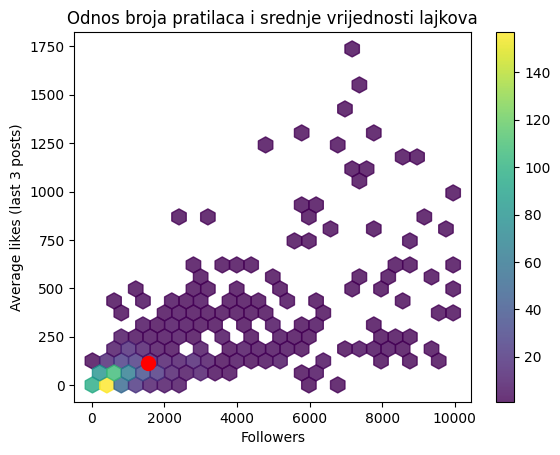

In [ ]:
x = df['Number of Followers']
y = df[['Tenth Post', 'Eleventh Post', 'Twelfth Post']].mean(axis=1)
fig, ax = plt.subplots()
hb = ax.hexbin(x, y, gridsize=25, cmap='viridis', mincnt=1, alpha=0.8)
cb = fig.colorbar(hb)
avg_likes = y.mean()
avg_followers = x.mean()
ax.plot(avg_followers, avg_likes, marker='o', color='red', markersize=10)
ax.set_xlabel('Followers')
ax.set_ylabel('Average likes (last 3 posts)')
ax.set_title('Odnos broja pratilaca i srednje vrijednosti lajkova')
plt.show()

In [ ]:
avg_likes = df[['Tenth Post', 'Eleventh Post', 'Twelfth Post']].mean().mean()
print(f"Srednja vrijednost broja lajkova svih korisnika je {avg_likes:.2f} čime je i potvrdjena pretpostavka")

Srednja vrijednost broja lajkova svih korisnika je 114.01 čime je i potvrdjena pretpostavka


# Pitanje 8: Da li korisnici imaju više pratilaca ili prate više ljudi?

In [ ]:
followers_median = df['Number of Followers'].median()
followings_median = df['Number of Followings'].median()
followers_mean = df['Number of Followers'].mean()
followings_mean = df['Number of Followings'].mean()
print(f"Median followers: {followers_median}")
print(f"Median followings: {followings_median}")
print(f"Mean followers: {followers_mean}")
print(f"Mean followings: {followings_mean}")
if followers_median > followings_median and followers_mean > followings_mean:
    print("Korisnici obično imaju više pratilaca nego što oni prate.")
elif followers_median < followings_median and followers_mean < followings_mean:
    print("Korisnici obično prate više ljudi nego što imaju pratilaca.")
else:
    print("Korisnici Imaju isti broj pratilaca i ljudi kojih oni prate")

Median followers: 769.0
Median followings: 1112.5
Mean followers: 1542.061
Mean followings: 1979.402
Korisnici obično prate više ljudi nego što imaju pratilaca.


# Pitanje 9 : Da li broj lajkova na desetom postu zavisi od broja profila koje korisnik prati?


Za navedeno pitanje ispitat ćemo joint-plot

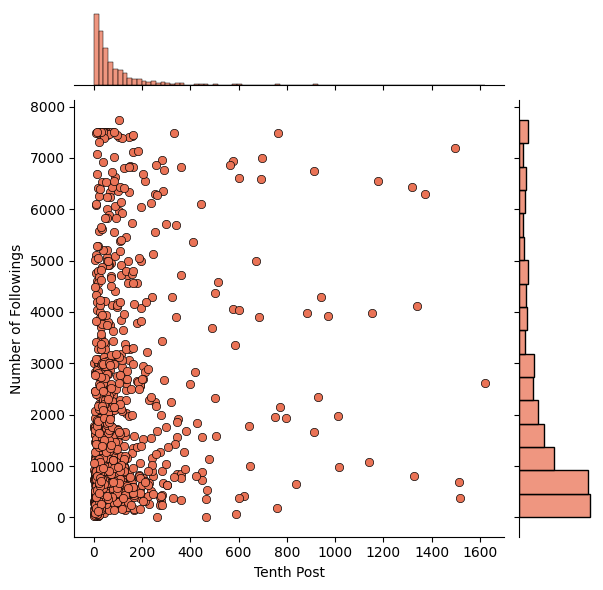

In [ ]:
sns.jointplot(x='Tenth Post', y='Number of Followings', data=df, color='#ea7356', joint_kws={'edgecolor': 'black'})

Obzirom da ne vidimo jasnu linearnu zavisnost ispitat ćemo još i kovarijasnu i korelaciju:

In [ ]:
#kovarijanska kod ženskog spola
zLikes = df.loc[df[' Gender'] =='f', 'Tenth Post']
zFollowings = df.loc[df[' Gender'] =='f', 'Number of Followings']
covariance = cov(zLikes, zFollowings)
print(covariance)

[[  35280.03755912   61606.22991583]
 [  61606.22991583 3638716.68687776]]


In [ ]:
#kovarijanska kod muškog spola
mLikes = df.loc[df[' Gender'] =='m', 'Tenth Post']
mFollowings = df.loc[df[' Gender'] =='m', 'Number of Followings']
covariance = cov(mLikes, mFollowings)
print(covariance)

[[  42950.42483367   89094.07991984]
 [  89094.07991984 4395360.84609219]]


In [ ]:
#korelacija
corr = np.corrcoef(zLikes, zFollowings)
print(corr)


[[1.         0.17194359]
 [0.17194359 1.        ]]


In [ ]:
#korelacija
corr = np.corrcoef(mLikes, mFollowings)
print(corr)

[[1.         0.20505381]
 [0.20505381 1.        ]]


Iz prikazanog možemo primijetiti da postoji veza između dvije varijable i da ne zavisi od spola osobe, što ujedno predstavlja odgovor na naše pitanje.

## Pitanje 10: Ako znamo da je osoba muškog spola, kolika je vjerovatnoća da će imati broj pratilaca veći od 90% osoba u setu podataka.

Da bismo odgovorili na ovo pitanje racunamo uslovnu vjerovatnocu $P(A|B)$, pri cemu je $A$ dogadjaj da osoba ima broj pratilaca veci od 90% osoba u setu podataka, a $B$ je dodgadjaj da se radi o osobi muskog spola:

$P(A|B)=\frac{P(A \cap B)}{P(B)}$

In [ ]:
brojnik = df[(df['Number of Followers']>np.percentile(df['Number of Followers'], 90) ) & (df[' Gender']=='m')].shape[0]
nazivnik = df[df[' Gender']=='m'].shape[0]
vjerovatnoca = brojnik / nazivnik
print(vjerovatnoca)

0.1


Odgovor: Vjerovatnoca da osoba muskog spola ima veci broj pratilaca od 90% svih osoba u setu podataka je 10%.

# Pitanje 11 : Da li ima više korisnika koji nemaju Self-Presenting Posts ili onih koji imaju bar jedan?


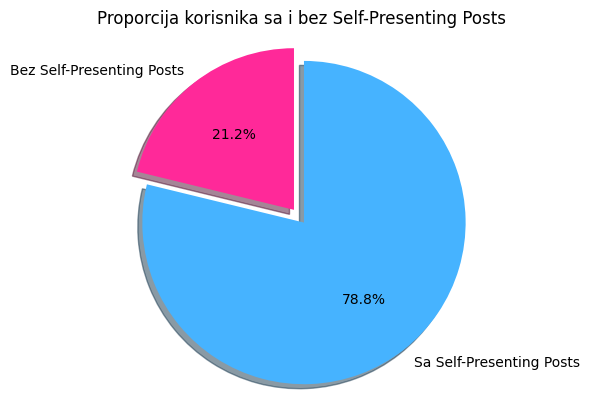

In [ ]:
no_self_presenting = df[df['Self-Presenting Posts'] == 0]['Self-Presenting Posts'].count()
self_presenting = df[df['Self-Presenting Posts'] > 0]['Self-Presenting Posts'].count()
labels = ['Bez Self-Presenting Posts', 'Sa Self-Presenting Posts']
values = [no_self_presenting, self_presenting]
fig, ax = plt.subplots()
colors = ['#ff2999','#46b3ff']
explode = (0, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90,explode=explode,colors=colors,shadow=True)
ax.axis('equal')
ax.set_title('Proporcija korisnika sa i bez Self-Presenting Posts')
plt.show()

Odgovor: Više ima onih koji imaju bar jedan Self-Presenting Post.

# Pitanje 12 : Kakva je razlika u broju objava između korisnika sa manje od 1000 pratilaca i korisnike sa više od 1000 pratilaca?


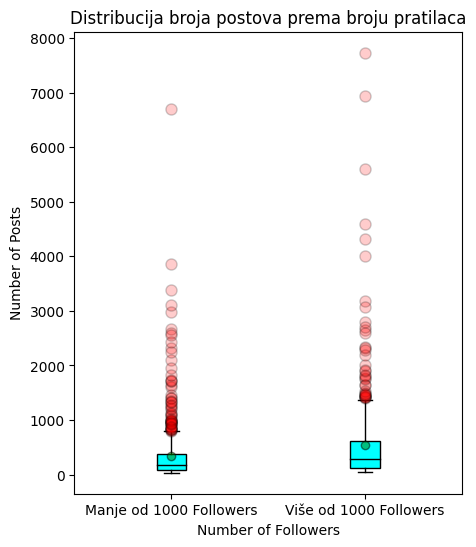

In [ ]:
df_less_1000 = df[df['Number of Followers'] < 1000]['Number of Posts']
df_more_1000 = df[df['Number of Followers'] >= 1000]['Number of Posts']
fig, ax = plt.subplots(figsize=(5,6))
ax.boxplot([df_less_1000, df_more_1000], labels=['Manje od 1000 Followers', 'Više od 1000 Followers'],patch_artist=True,
           boxprops=dict(facecolor='cyan', color='black'),flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.2),
           medianprops=dict(color='black'), showmeans=True, meanprops=dict(marker='o', markeredgecolor='black',markerfacecolor='green',alpha=0.5))
ax.set_xlabel('Number of Followers')
ax.set_ylabel('Number of Posts')
ax.set_title('Distribucija broja postova prema broju pratilaca')
plt.show()

Odgovor: Korisinci sa više pratilaca imaju u prosjeku i veći broj postova što je bilo i za očekivati.

# Pitanje 13 : Da li broj lajkova korisnika zavisi od broja Self-Presenting Postova?

Da bi odgovorili na pitanje prvo ćemo se vratiti na pitanje 6 gdje smo ispitivali zavisnost lajkova na postovima koristeći sljedeći graf:

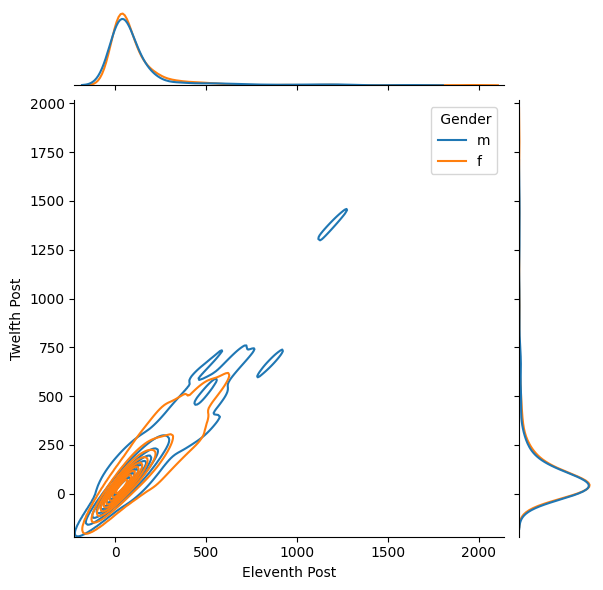

In [ ]:
sns.jointplot(data=df, x="Eleventh Post", y="Twelfth Post", kind="kde", hue=" Gender")

Budući da smo utvrdili da nema značajnih razlika u broju lajkova, pretpostavit ćemo da je broj lakova na ostalim objavama sličan. Uzimajući u obzir pretpostavku, ispitat ćemo zavisnost broja Self-Presenting postova sa brojem lajkova na desetom postu, gdje uvažavamo pretpostavku da broj lajkova na zadnjih devet postova ( među kojim gledamo broj Self-Presenting postova) je sličan broju lajkova na desetom. Ovu zavisnost ćemo prikazati na sljedeći način:

In [ ]:
filtered_df = df.loc[df['Number of Posts'] <= 5000,['Tenth Post', 'Self-Presenting Posts', 'Number of Posts']]

fig = px.scatter(filtered_df, x='Tenth Post', y='Self-Presenting Posts', color='Number of Posts', color_discrete_sequence=['blue', 'pink'])

fig.show()

Analizom navedenog scatter-plota možemo zaključiti da ne postoji značajna veza između broja Self-Presenting postova i broja lajkova. Međutim, primjećujemo da korisnici čije objave prelaze 500 lajkova u najvećem udjelu su oni koji se pojavljuju u zadnjih devet postova( to jeste broj Self-Presenting postova je 9). Pošto smo ispitali i zaključili da rezultat ne zavisi od ukupnog broja postova, možemo zaključiti da postoji slabija veza između broja lajkova i Self-Presenting postova.